# A/B Test Analysis for Coffee Shop Sales Data

In this analysis, I will invetigate whether  whether there is a significant difference in the mean unit prices of products sold between two store locations: 'Lower Manhattan' and 'Hell's Kitchen'. To achieve this,I employ an A/B testing approach using transaction data from a coffee shop.
Businesses perfrom A/B Test Analysistest to make data-driven decisions. For instance, understanding the differences in unit prices between store locations can help a business determine whether different pricing strategies are needed for different locations as well as assess the performance of sales in various locations and identify areas for improvement.

## 1. Load and Clean the Data

In [1]:
# Import Libraries
import pandas as pd  # Data manipulation
import numpy as np  # Linear Algebra
from scipy.stats import ttest_ind, mannwhitneyu, shapiro  # Statistical tests
import matplotlib.pyplot as plt  # Data visualization

from scipy.stats import norm, zscore  # Additional statistical functions

In [4]:
# Load the data from Excel file
data = pd.read_excel('CoffeeShopSales.xlsx')

# Display the first few rows of the data
data.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [5]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

The first step in the analysis process is to load the data and the associated libraries. This involves importing necessary Python libraries such as pandas for data manipulation, numpy for numerical operations, scipy for statistical tests, and seaborn and matplotlib for data visualization. 
Once the data is loaded, it is crucial to perform a preliminary check for any missing values. Missing values can significantly impact the results of an analysis, leading to inaccuracies or biased outcomes. Fortunately, in this dataset, there are no missing values. 

## 2. Define Hypotheses

The  A/B test is used to compare the mean unit price of products sold in 'Lower Manhattan' and 'Hell's Kitchen'. 

**Hypotheses:**
- Null Hypothesis (H0): There is no difference in the mean unit price between 'Lower Manhattan' and 'Hell's Kitchen'.
- Alternative Hypothesis (H1): There is a difference in the mean unit price between 'Lower Manhattan' and 'Hell's Kitchen'.

$\begin{align}
  & {{H}_{0}}:\,{{\mu }_{1}}\,=\,{{\mu }_{2}} \\ 
 & {{H}_{1}}:\,{{\mu }_{1}}\,\ne \,{{\mu }_{2}} \\ 
\end{align}$

## 3. Checking for Normality and Selecting the Statistical Test

Before performing any statistical test, it's crucial to check the normality of the data. The normality assumption is fundamental for parametric tests, which require the data to follow a normal distribution. If the data is not normally distributed, parametric tests may yield inaccurate results.

In this analysis, i used the Shapiro-Wilk test to assess the normality of the unit price distributions for both 'Lower Manhattan' and 'Hell's Kitchen'. The results were as follows:

In [4]:
# Split data by store location
lower_manhattan = data[data['store_location'] == 'Lower Manhattan']['unit_price']
hells_kitchen = data[data['store_location'] == "Hell's Kitchen"]['unit_price']

# Check for normality
shapiro_lower = shapiro(lower_manhattan)
shapiro_hells = shapiro(hells_kitchen)

shapiro_lower, shapiro_hells

D:\Python\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(ShapiroResult(statistic=0.39346790313720703, pvalue=0.0),
 ShapiroResult(statistic=0.3579275608062744, pvalue=0.0))

The p-values for both tests are 0.0, which are less than the typical significance level of 0.05. This indicates that the unit price distributions for both store locations are not normally distributed. 
This is also evidenced by the two histograms below which show that the data is significantly skewed to the right and it does not follow a normal distribution.
As a result, i opted for a non-parametric test for further analysis.

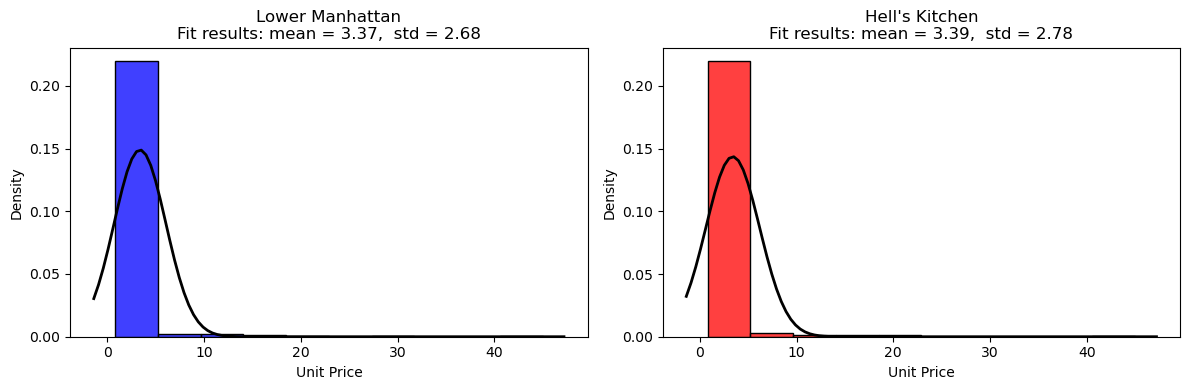

In [18]:
# Plot histograms with normal distribution curve
plt.figure(figsize=(12, 4))

# Histogram for Lower Manhattan
plt.subplot(1, 2, 1)
sns.histplot(lower_manhattan, kde=False, color='blue', bins=10, stat='density')
mean, std = lower_manhattan.mean(), lower_manhattan.std()
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mean = %.2f,  std = %.2f" % (mean, std)
plt.title("Lower Manhattan\n" + title)
plt.xlabel('Unit Price')
plt.ylabel('Density')

# Histogram for Hell's Kitchen
plt.subplot(1, 2, 2)
sns.histplot(hells_kitchen, kde=False, color='red', bins=10, stat='density')
mean, std = hells_kitchen.mean(), hells_kitchen.std()
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mean = %.2f,  std = %.2f" % (mean, std)
plt.title("Hell's Kitchen\n" + title)
plt.xlabel('Unit Price')
plt.ylabel('Density')

plt.tight_layout()
plt.show()


## 4. A/B Testing with Mann-Whitney U Test

In [8]:
# Conduct the appropriate test based on normality results
# The code checks whther the shapiro test is significant before decising to proceed with either parametric or non-parametric test
if shapiro_lower.pvalue > 0.05 and shapiro_hells.pvalue > 0.05:
    # Both distributions are normal, use t-test
    test_result = ttest_ind(lower_manhattan, hells_kitchen, equal_var=False)
else:
    # Distributions are not normal, use Mann-Whitney U test
    test_result = mannwhitneyu(lower_manhattan, hells_kitchen)

test_result

# Interpret the results
if test_result.pvalue < 0.05:
    result = "Reject the null hypothesis. There is a significant difference in the mean unit price between Lower Manhattan and Hell's Kitchen."
else:
    result = "Fail to reject the null hypothesis. There is no significant difference in the mean unit price between Lower Manhattan and Hell's Kitchen."

result

MannwhitneyuResult(statistic=1202947673.5, pvalue=0.03804443501312917)

Given the non-normal distribution of the data, i used the Mann-Whitney U test to compare the unit prices between 'Lower Manhattan' and 'Hell's Kitchen'.
The Mann-Whitney U test had a a p-value of 0.038. The p-value is less than the significance level of 0.05, indicating that we reject the null hypothesis. This means there is a statistically significant difference in the unit prices between 'Lower Manhattan' and 'Hell's Kitchen'.
The Mann-Whitney U test does not assume normal distribution and is suitable for comparing differences between two independent groups when the assumption of normality is violated. This makes it the appropriate choice for our analysis.

## 6. Visualize the Data with Plots

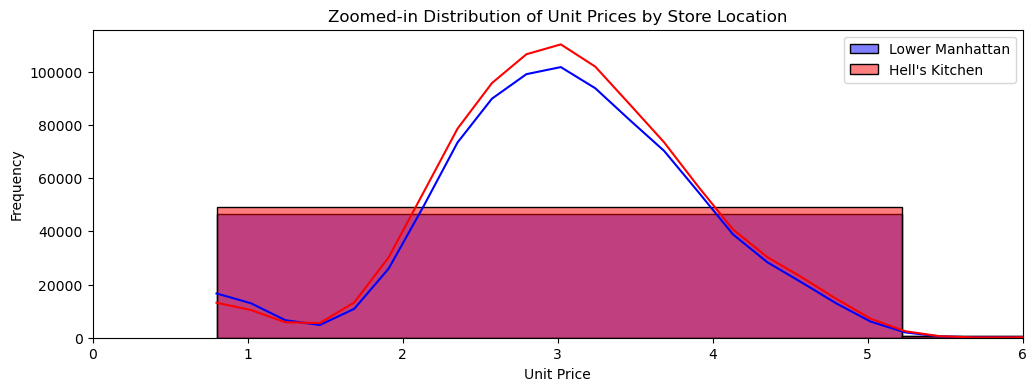

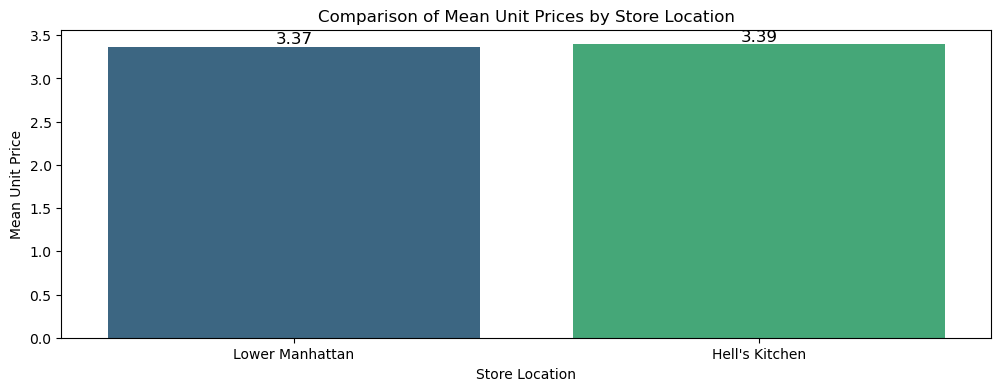

In [19]:
# Visualize the Data with Zoomed-in Distribution Plot
plt.figure(figsize=(12, 4))

sns.histplot(lower_manhattan, kde=True, color='blue', label='Lower Manhattan', bins=10)
sns.histplot(hells_kitchen, kde=True, color='red', label="Hell's Kitchen", bins=10)

plt.xlim(0, 6)  # Adjust the x-axis limits to zoom in on the unit prices range
plt.title('Zoomed-in Distribution of Unit Prices by Store Location')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Calculate means for each store location
mean_lower_manhattan = lower_manhattan.mean()
mean_hells_kitchen = hells_kitchen.mean()

means = pd.DataFrame({
    'Store Location': ['Lower Manhattan', "Hell's Kitchen"],
    'Mean Unit Price': [mean_lower_manhattan, mean_hells_kitchen]
})

# Create the bar chart
plt.figure(figsize=(12, 4))
bar_plot = sns.barplot(x='Store Location', y='Mean Unit Price', data=means, palette='viridis')

# Add mean labels on the bars
for index, row in means.iterrows():
    bar_plot.text(index, row['Mean Unit Price'], f'{row["Mean Unit Price"]:.2f}', color='black', ha="center", va="bottom", fontsize=12)

# Title and labels
plt.title('Comparison of Mean Unit Prices by Store Location')
plt.xlabel('Store Location')
plt.ylabel('Mean Unit Price')
plt.show()


From the distribution plot above, it is evident that Hell's Kitchen generally has higher unit prices compared to Lower Manhattan. This observation is further corroborated by the bar chart, which illustrates the average unit prices for the two locations. The mean unit price in Hell's Kitchen is 3.39, which is slightly higher than the mean unit price of 3.37 in Lower Manhattan.

## 6. Conclusion

In this analysis, I first checked the normality of the unit price data using the Shapiro-Wilk test. The results indicated that the unit price distributions for both 'Lower Manhattan' and 'Hell's Kitchen' were not normally distributed. Therefore, we opted for a non-parametric test, specifically the Mann-Whitney U test, to compare the unit prices between the two store locations.

Based on the Shapiro-Wilk test results and the subsequent Mann-Whitney U test, I can confidently reject the null hypothesis. There is a significant difference in the unit prices between 'Lower Manhattan' and 'Hell's Kitchen'. This insight can help the business make informed decisions regarding pricing strategies, inventory management, and resource allocation for these locations.

Thes  distribution plot support the conclusion by showing the distribution of unit prices and highlighting the differences in the mean unit prices between 'Lower Manhattan' and 'Hell's Kitchen'  where prices are lower in Lower manhattan.  